# **Assignment 2**

This assignment covers some basics of linear classification and gradient descent method. You can still use the same ''breast cancer dataset'' from the Assignment 1, and check the effect of different hyperparameters. The main goal of this assignment is to familiarize you further with the Jupyter/Colab environment and python pakcages (Numpy, matplotlib, pandas, scikit learn, etc.) that we explored in Week 2, and get familiar with linear classification and different gradient descent methods.

<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## <font color = 'Yellow'> **Question 1. Practice with linear classification** </font>

### <font color = 'Yellow'> **1.**  Load breast cancer dataset.</font>

Practice to use pandas to create a dataframe based on the feature matrix of the cancer dataset, and set the columns as the feature names.

<b>Answer</b>

In [30]:
#Import necessary  Library
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# load breast cancer dataset
ds = load_breast_cancer()
samples, label, feature_names = ds.data, ds.target, ds.feature_names

# create a dataframe df from the numpy array (data array), with columns representing feature names.
df = pd.DataFrame(samples, columns=feature_names)

#print(df)
print(df)

# Use dataframe.describe() function to examine the statistical infromation of the dataset.
df.describe()
#df.head()




     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### <font color = 'YELLOW'> **2.** Visualize features in a boxplot.</font>

The feature indices are [4, 5, 6, 7, 8], suggestions: 1) use the Pandas <code>boxplot</code> function, 2) plot the boxplot with the "color theme" given below.

<b>Answer</b>

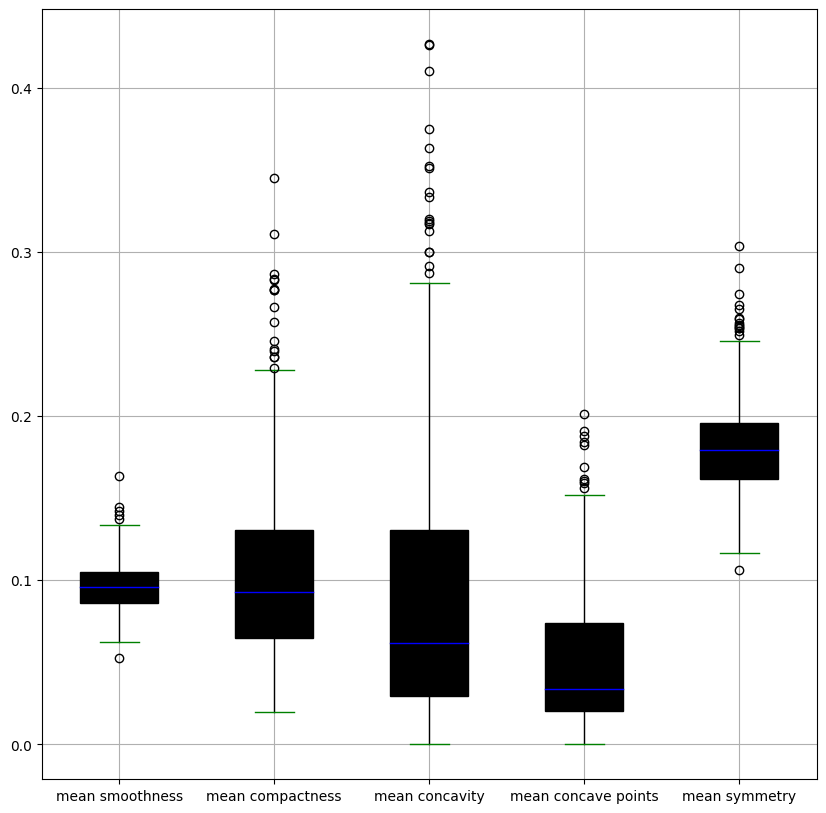

In [31]:
#Color Code to use for boxplot
color = {
    "boxes": "k",
    "whiskers": "k",
    "medians": "b",
    "caps": "green",
}


#list of feature indices to draw boxplot
feature_indices = [4, 5, 6, 7, 8]

#select the columns from df Dataframe
selected_columns = df.iloc[:, feature_indices]

# creating a larger figure size to plot
plt.figure(figsize=(10, 10))

#create a boxplot with patch_artist true in order to customise color
b_plot = selected_columns.boxplot(patch_artist=True,
                                  boxprops={"facecolor": color["boxes"]},
                                  whiskerprops={"color": color["whiskers"]},
                                  medianprops={"color": color["medians"]},
                                  capprops={"color": color["caps"]}
                                  )

# Show the plot
plt.show()

### <font color = 'YELLOW'> **3.** Feature scaling

Perform feature scaling before training, visualize feature matrix with <code> plt.imshow </code>, before and afer scaling. <font>

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

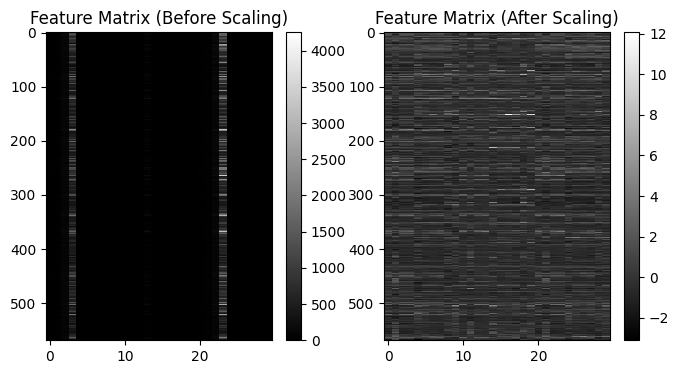

In [32]:
#import necessary Library
from scipy.sparse import data
from sklearn.preprocessing import StandardScaler

# feature scaling and standarization
#scaling
scaler = StandardScaler()
X_standardized = scaler.fit_transform(ds.data)
X_scaled = pd.DataFrame(X_standardized, columns=feature_names)
print(X_scaled.head())


# plot the feature matrix before  scaling
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ds.data, cmap='gray', interpolation='none', aspect='auto')
plt.title('Feature Matrix (Before Scaling)')
plt.colorbar()

# Plot the feature matrix after scaling
plt.subplot(1, 2, 2)
plt.imshow(X_standardized, aspect='auto', cmap='gray', interpolation='none')
plt.title('Feature Matrix (After Scaling)')
plt.colorbar()
plt.show()

### <font color = 'YELLOW'> **4.**  Split original dataset into train and test set (80% train and 20% test).</font>

In [33]:
# Splitting into train and test (80% train, 20% test)

#import necessary Library
from sklearn.model_selection import train_test_split


#Orignal dataset used instead of scaled for Machine learning as we are required to Split original dataset into train and test set (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size=0.2, random_state=24)

### <font color = 'YELLOW'> **5.** Linear classification

After reviewing and understanding main features of the dataset, you will start to implement a linear classification on the dataset. Several steps to follow:

- Train a linear classifier with different optimization algorithms, i.e., gradient descent (GD), Stochastic Gradient descent (SGD) and minibatch gradient descent (GD). Plot the traning loss over epochs for GD, SGD, and minibatch GD, respectively.

- Apply the parameters (or weights **w**) optimized by GD, SGD and mini-batch GD for predicting the test dataset.

- Compute the test accuracy corresponding to the three classifiers trained with GD, SGD, minibatch GD, respectively; and then print the accuracy values.

- Compute the confusion matrix and visualize it as a *heatmap* to evaluate the classification accuracy for test data, see example in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.

<font>

In [34]:
####Define Fucntions
# Sigmoid Funtion
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Accuracy Funtion
def accuracy(predictions, labels):
    return np.mean((predictions >= 0.5) == labels)



# classifier 1: optimized with Gradient Descent
def gradient_descent(X,y, learning_rate, num_epochs):
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []
    for i in range(num_epochs):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        w -= learning_rate * gradient
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        loss_history.append(loss)

    return w, loss_history


# classifier 2: optimized with Stochastic Gradient Descent
def sgd(X, y, learning_rate, num_epochs):
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []

    for epoch in range(num_epochs):
        random_index = np.random.randint(0, m)
        xi = X[random_index]
        yi = y[random_index]
        z = np.dot(xi, w)
        prediction = sigmoid(z)
        error = prediction - yi
        gradient = np.dot(xi.T, error)
        w -= learning_rate * gradient
        loss = -np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w))))
        loss_history.append(loss)

    return w, loss_history


# classifier 3: optimized with Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate, num_epochs, batch_size):
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []

    for epoch in range(num_epochs):
        i = np.random.randint(0, m)
        xi = X[i:i+batch_size]
        yi = y[i:i+batch_size]
        z = np.dot(xi, w)
        predictions = sigmoid(z)
        error = predictions - yi
        gradient = np.dot(xi.T, error) / batch_size
        w -= learning_rate * gradient
        loss = -np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w))))
        loss_history.append(loss)

    return w, loss_history


# Prediction Function
def predict(X, w):
    return sigmoid(np.dot(X, w))




# Training  (call three different classifers here)
#### epochs = 1000, you may want to test two different batch sizes (16, 32);
#### and differnet learning rates (0.001, 0.01) to find the best parameters to
#### achieve good performance.


# Set hyperparameters
learning_rate = 0.001
num_epochs = 1000
batch_size = 32  # For mini-batch GD

#scaling the data to reducse the computational overflow
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Learning all gradients
#Gradient Descent
w_gd, loss_history_gd = gradient_descent(X_train, y_train, learning_rate, num_epochs)
# SGD
w_sgd, loss_history_sgd = sgd(X_train, y_train, learning_rate, num_epochs)
# Mini-Batch Gradient Descent
w_mini_batch, loss_history_mini_batch = mini_batch_gradient_descent(X_train, y_train, learning_rate, num_epochs, batch_size)



#testing the model
predictions_gd = predict(X_test, w_gd)
predictions_sgd = predict(X_test, w_sgd)
predictions_mini_batch = predict(X_test, w_mini_batch)


# Calculate mean test accuracy
accuracy_gd = accuracy(predictions_gd, y_test)
accuracy_sgd = accuracy(predictions_sgd, y_test)
accuracy_mini_batch = accuracy(predictions_mini_batch, y_test)

print(f"\n\n\nAccuracy for (Gradient Descent): {accuracy_gd:.2f}")
print(f"Accuracy for (Stochastic Gradient Descent): {accuracy_sgd:.6f}")
print(f"Accuracy for (Mini-Batch Gradient Descent): {accuracy_mini_batch:.6f}\n\n\n")





Accuracy for (Gradient Descent): 0.96
Accuracy for (Stochastic Gradient Descent): 0.956140
Accuracy for (Mini-Batch Gradient Descent): 0.956140





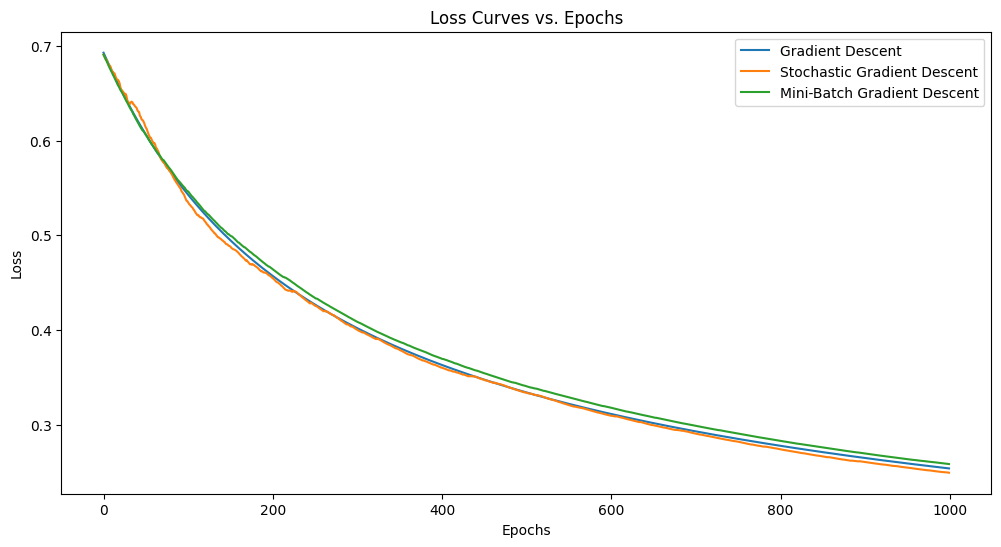

In [35]:
# Plotting loss curves over epochs for GD, SGD, minibatch GD algorithms
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history_gd)), loss_history_gd, label='Gradient Descent')
plt.plot(range(len(loss_history_sgd)), loss_history_sgd, label='Stochastic Gradient Descent')
plt.plot(range(len(loss_history_mini_batch)), loss_history_mini_batch, label='Mini-Batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves vs. Epochs')
plt.show()

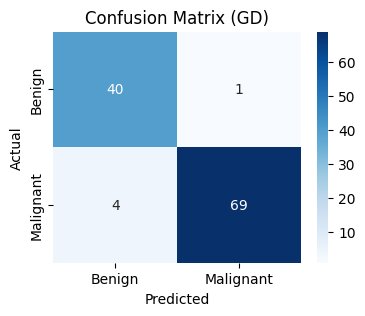

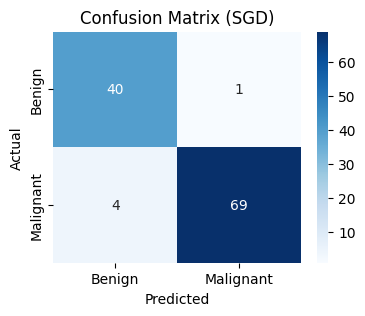

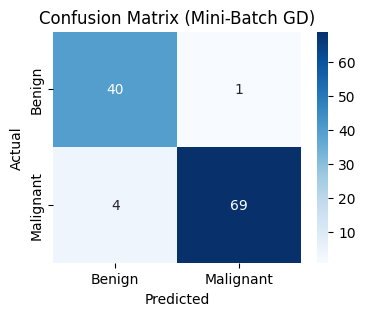

In [36]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns

#define Confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Compute confusion matrices
cm_gd = confusion_matrix(y_test, (sigmoid(np.dot(X_test, w_gd))) > 0.5)
cm_sgd = confusion_matrix(y_test, (sigmoid(np.dot(X_test, w_sgd))) > 0.5)
cm_mini_batch = confusion_matrix(y_test, (sigmoid(np.dot(X_test, w_mini_batch))) > 0.5)

# Plot confusion matrices
plot_confusion_matrix(cm_gd, 'Confusion Matrix (GD)')
plot_confusion_matrix(cm_sgd, 'Confusion Matrix (SGD)')
plot_confusion_matrix(cm_mini_batch, 'Confusion Matrix (Mini-Batch GD)')